# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from random import shuffle

In [2]:
nums = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [3]:
def get_sum(numbers: List):
  sum_ = 0
  for number in numbers:
    sum_ += number

  return sum_

In [4]:
def get_mean(numbers):


  return get_sum(numbers) / len(numbers)

In [5]:
get_mean(nums)

3052.714285714286

In [6]:
def get_sum_difference(numbers, mean = None):
  if not mean:
    mean = get_mean(numbers)
  sum_squared_diff = 0
  for number in numbers:
    diff = number - mean
    sum_squared_diff += diff ** 2
  
  return sum_squared_diff

In [7]:
def get_variance(numbers):
  return get_sum_difference(numbers) / (len(numbers) - 1)

In [8]:
get_variance(nums)

214387.90476190473

In [9]:
def get_std(numbers):
  return get_variance(numbers) ** (1/2)

In [10]:
get_std(nums)

463.0204150595357

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [11]:
nums2 = [127, 80, 105, 92, 120, 115, 93]

In [12]:
np.cov(nums, nums2)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [13]:
customers_std = get_std(nums2)
sales_std = get_std(nums)

In [14]:
corr = np.cov(nums,nums2)[0][1] / (customers_std * sales_std)
corr

0.9628339778148909

In [15]:
weeks_df = pd.DataFrame({1:nums, 2:nums2})

In [16]:
weeks_df

,1,2
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [17]:
weeks_df.corr()

,1,2
1,1.000000,0.962834
2,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [18]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv", index_col=0)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [19]:
titanic_df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [20]:
titanic_df.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [67]:


def get_colors():
  colors = [
    'red',
    'blue',
    'gold',
    'green',
    'orange',
    'dodgerblue',
    'firebrick',
    'chocolate',
    'limegreen',
    'darkgreen',
    'darkblue'
  ]

  shuffle(colors)

  for color in colors:
    yield color

def setup_plot():
  fig, ax = plt.subplots(1,1)
  ax.grid()
  plt.xlim(-2, 25)
  plt.ylim(-2, 25)
  return fig, ax

def get_formatting():
  formatting = {
    'head_width': 1, 
    'head_length': 1,
    'linewidth': 3,
    'length_includes_head': True }
  return formatting

def plot_2d_vectors(vectors):

  formatting = get_formatting()
  fig, ax = setup_plot()

  colors = get_colors()


  for vector in vectors:
    plt.arrow(0, 0, *vector, **formatting, color = next(colors))

  
  plt.show()

In [22]:
ls = [np.array([0,10]), np.array([10,0])]

<IPython.core.display.Javascript object>


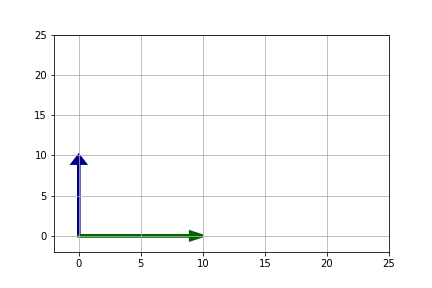

In [33]:
plot_2d_vectors(ls)

* Orthoganal is a nother word for perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [24]:
a = np.array([-5,3,7])

b = np.array([6,-8,2])

In [25]:
np.dot(a,b)

-40

These vectors are not ortogonal. Their dot products do not equal $0$

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [26]:
c = np.array(
              [2,-15,6,20]
)

In [27]:
np.linalg.norm(c)**2

665.0

In [28]:
np.dot(c,c)

665

In [29]:
np.matmul(c.T, c)

665

The values are equal

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$$d = 7\hat{i} + 12\hat{j}$$

$$e = 2\hat{i} + 11\hat{j} -8\hat{k}$$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [43]:
f = np.array([4,12,11,9,2])
f_norm = np.linalg.norm(f)
print(f'The unit vector in the direction of f, or f_hat, is \n{(f/f_norm).round(3)}')

The unit vector in the direction of f, or f_hat, is 
[0.209 0.627 0.575 0.47  0.105]


$$\hat{f} = 0.209\hat{x}_1 + 0.627\hat{x}_2 + 0.575\hat{x}_3 + 0.470\hat{x}_4 + 0.105\hat{x}_5$$


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [52]:
u = np.array([2,2,2])
v = np.array([1,1,1])

In [82]:
def plot_quiver(vectors,lim = 3):
  from mpl_toolkits.mplot3d import Axes3D
  fig, ax = setup_plot()
  formatting = {'length':1, 'linewidth':3}
  colors = get_colors()


  ax = fig.add_subplot(111, projection='3d')
  ax.set_xlim([0, lim])
  ax.set_ylim([0, lim])
  ax.set_zlim([0, lim])
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  ax.set_zlabel('Z')
  origin = [0,0,0]
  for vector in vectors:
    ax.quiver(*origin, *vector, **formatting, color = next(colors))

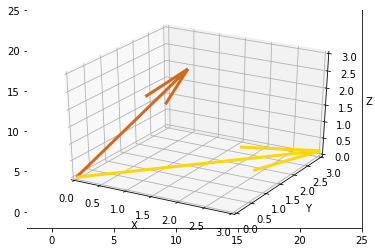

In [83]:
plot_quiver((u,v))

In [76]:
u = np.array([1,2,2.5])
v = np.array([4,1,1.5])

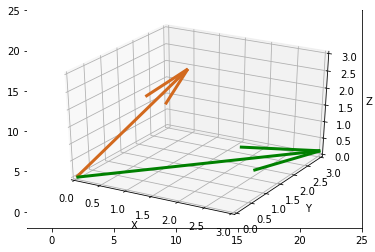

In [77]:
plot_quiver((u,v))

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [79]:
g = np.array([1,2])
h = np.array([4,8])

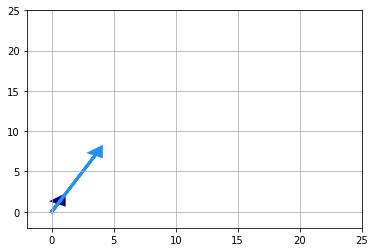

In [81]:
plot_2d_vectors((g,h))

* Since these vectors are co-linear, they do not span the entire place

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [85]:
vectors = [
    np.array([1,2,3]),
    np.array([-1,0,7]),
    np.array([4,8,2])
]

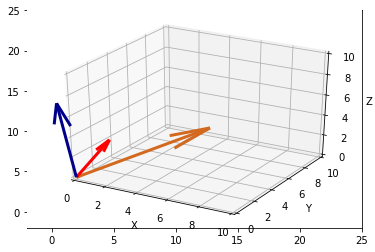

In [87]:
plot_quiver(vectors,10)

* Since these vectors are not co-linear, their span is $\mathbb{R}^3$

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

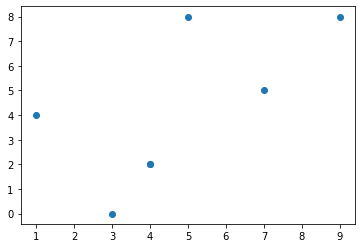

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()